# SuperVise Machine Learning 

## Linear Regression 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
## load dataset to local storage using pandas 
df = pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

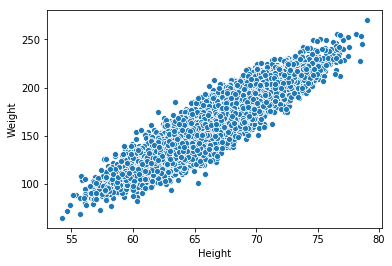

In [5]:
sns.scatterplot(df['Height'],df['Weight'])   # to draw scatter plot between Height and Weight which will be our 
plt.show()                                   #  Features and target(labels) 

In [6]:
features = df["Height"]    # features(attributes) = X  
target = df["Weight"]      # target (labels) =   Y

In [7]:
features.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [8]:
target.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [9]:
def split(features,target,test_size=0.33):   # test data will be 33% of all dataset
    length = len(features)
    test_length = round(length*test_size)
    train_length = length - test_length
    X_train = features[:train_length]       # features Training Data = X
    X_test = features[train_length:]        # features Testing Data  = X
    y_train = target[:train_length]         # target Trainig Data    = y
    y_test = target[train_length:]          # target Testing Data    = y
    return X_train,X_test,y_train,y_test   # it will return traing testing data

In [10]:
X_train,X_test,y_train,y_test = split(features,target)    # calling split Function to get Training Testing Data

In [11]:
len(X_train)

6700

In [12]:
len(X_test)

3300

In [13]:
X_train.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [14]:
y_train.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [15]:
y_bar = y_train.mean()    ## This is y_bar and 
x_bar = X_train.mean()    ## This is x_bar

In [16]:
y_bar

173.95858300158133

In [17]:
x_bar

67.66760336921872

### To Calculate value of m

$$ \text{y_bar = 172.22861448252334   } $$
$$ \text{x_bar = 67.48645499621131 } $$

$$ \text{m = }\frac { \text{ ( (x_bar-X_train)*(y_bar-y_train) ).sum()}} { \text {((x_bar-X_train)**2).sum()} }  $$

$$ m = \sum\limits_{i=1}^{N}  \frac { ( \bar{y} - {y_i} ) ( \bar {x} - {x_i} ) } { ( \bar x - x_i)^2 } $$




#### Training or Fitting

In [18]:
m=(((x_bar-X_train)*(y_bar-y_train)).sum())/((x_bar-X_train)**2).sum()

#### Here is our coefficient 

In [19]:
m

7.441657677165204

### let's calculate intercept 

In [20]:
c = y_bar - m * x_bar
c

-329.60055710633526

### We know that y=mx+c

In [21]:
height = 60 # x=60
# and we have already calculated m and c so,
print("Height = ",height)
weight = m * height + c 
print(weight)

Height =  60
116.89890352357696


In [22]:
## This is predict funtion which calculate y_predict values for X_train data
y_pred = m * X_train + c 

In [23]:
y_pred[:5]

0    219.943664
1    182.250827
2    221.901478
3    204.196829
4    190.435846
Name: Height, dtype: float64

In [24]:
y_train[:5]

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

## Line Fitting to Training Data

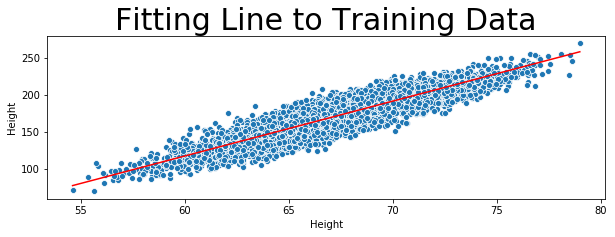

In [25]:
plt.figure(figsize=(10,3))
plt.xlabel("Height")
plt.ylabel("Weight")
sns.scatterplot(X_train,y_train)
sns.lineplot(X_train,y_pred,color='red')
plt.title("Fitting Line to Training Data",fontsize=30)
plt.show()

In [26]:
X_test[:5] # Actual Value for X

6700    60.716082
6701    62.644217
6702    60.955487
6703    68.850260
6704    63.593709
Name: Height, dtype: float64

In [27]:
y_test[:5]   # Actual Value for Y

6700    130.647715
6701    123.792897
6702    105.880581
6703    178.295462
6704    144.419187
Name: Weight, dtype: float64

In [28]:
y_pred = m * X_test[:5]  + c 
y_pred[:5]  # Predicted Value for Y

6700    122.227743
6701    136.576261
6702    124.009308
6703    182.759506
6704    143.642057
Name: Height, dtype: float64

#### Mean Squared Error 
$$ MSE = \frac { \sum\limits_{i=1}^N ( \hat {y_i} - y_i )^2  } { N } $$

In [29]:
mse = ( ( y_pred - y_test ) ** 2 ).sum() / len(y_test)

In [30]:
mse

0.17681596377360714

# Same Work With Using sklearn

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


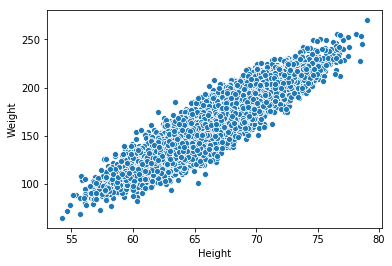

In [33]:
sns.scatterplot(x=df['Height'], y=df['Weight'])
plt.show()

In [34]:
features = df[['Height']] # features and target
target = df['Weight']

In [35]:
from sklearn.model_selection import train_test_split # import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [36]:
len(X_train),len(X_test)

(6700, 3300)

In [37]:
# create model called lin with importing LinearRegression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [38]:
lin.fit(X_train,y_train) # Fitting Training Data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lin.coef_  # value of m

array([7.6904068])

In [40]:
lin.intercept_  # value of c

-348.9891646153016

In [41]:
y_pred = lin.predict(X_test)  # predict value for X_test

In [90]:
# predict target for features=60
lin.predict([[60]])  # predict y value where x value, which is  60

array([112.43524358])

In [42]:
y_pred[:5] # predicted values

array([179.24359313, 180.33641209, 161.63945358, 204.17672178,
       166.59803298])

In [45]:
np.array(y_test.head()) 

array([173.11581259, 195.1620421 , 170.21745116, 215.04965996,
       182.72145243])

## Fitting Line to Training Data

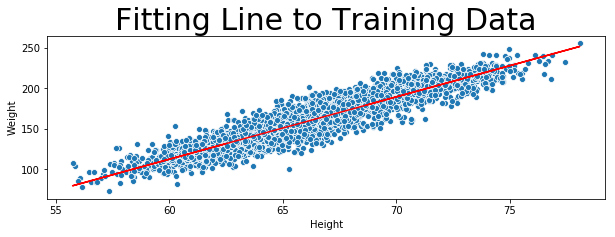

In [86]:
plt.figure(figsize=(10,3))
plt.xlabel("Height")
plt.ylabel("Weight")
sns.scatterplot(x=X_test['Height'], y=y_test)
plt.plot(X_test['Height'],y_pred,color='red')
plt.title("Fitting Line to Training Data",fontsize=30)
plt.show()

# 2nd Dataset (Tips dataset)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
plt.style.use("seaborn-whitegrid")

#### Load your data sets

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### sns pairplot for check relation between data

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

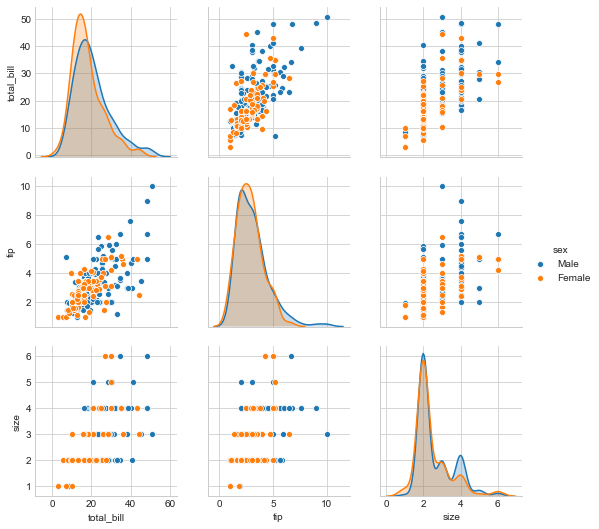

In [4]:
sns.pairplot(tips,'sex')
plt.plot

### Linear Regression $ y = \beta_0 + \beta_1 X $

#### where X is Feature which is independent and y is target to be predicted which depends on X and $ \beta_0 $ is known intercept and $ \beta_1 $ is known as coefficient 


### here X --> total_bill ( feature )
### here Y --> tip ( target ) 

### Step2 --> split your data into Training and Testing Data set 

In [6]:
features = tips[['total_bill']] #2D
target = tips['tip'] # 1D

In [7]:
from sklearn.model_selection import train_test_split # train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
         features, target, test_size=0.33, random_state=42)

In [9]:
len(X_train),len(X_test)

(163, 81)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin = LinearRegression() # creating a model 

### Step 3 Trained your model or fitting data to model

In [13]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### here is our intercept $\beta_0$

In [14]:
lin.intercept_  # value of c

0.8207989142570455

#### here is our coefficient $ \beta_1$

In [15]:
lin.coef_   # value for m

array([0.112207])

#### lets find pridicted values of y as $\hat y$

In [17]:
y_pred = lin.predict(X_test)
y_pred[:5]

array([3.0447416 , 1.80485428, 3.5754807 , 3.72583807, 2.27948988])

In [18]:
np.array(X_test[:5])[:,0]

array([19.82,  8.77, 24.55, 25.89, 13.  ])

In [19]:
np.array(y_test[:5])

array([3.18, 2.  , 2.  , 5.16, 2.  ])

### Model Evaluation 

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.7795244566068926

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3991742243456696

### Visulations 

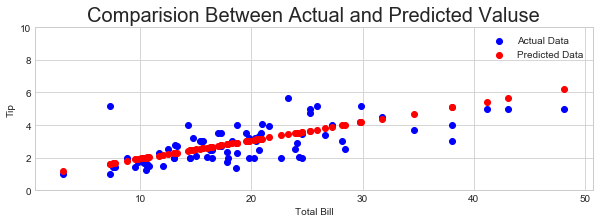

In [22]:
plt.figure(figsize=(10,3))
plt.title("Comparision Between Actual and Predicted Valuse",fontsize=20)
plt.scatter(X_test,y_test,c='b',label="Actual Data")
plt.scatter(X_test,y_pred,c='r',label="Predicted Data")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.ylim([0,10])
plt.show()
